In [1]:
%load_ext autoreload
import uproot as ut
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np
import re
import sympy as sp
import math
import vector

from tqdm import tqdm

from utils import *
%autoreload 2

In [2]:
filename = "../signal/NanoAOD/NMSSM_XYH_YToHH_6b_MX_700_MY_400_accstudies_500k_Jul2021.root:sixBtree"
ttree = ut.open(filename)
branches = Branches(ttree)
preselection = Selection(branches,cuts={"njetcut":6},tag="preselection")
sixb_in_preselection = preselection.nsixb_selected == 6
print(preselection)
baseline = Selection(branches,mask=sixb_in_preselection,include=preselection,tag="baseline")
print(baseline)

--- all preselection ---
Event Efficiency:   0.74
Selected Purity(6): 0.29
Passed Jet S/T:     0.69
--- all baseline ---
Event Efficiency:   0.29
Selected Purity(6): 1.00
Passed Jet S/T:     0.79


# Six Jet Selection

In [3]:
first_remaining = Selection(branches,include=baseline,tag="remaining")
first_signaljet = Selection(branches,cuts=dict(njetcut=1,ptcut=60,btagcut=jet_btagWP[tightWP]),njets=1,include=baseline,tag="T60")

In [4]:
second_remaining = Selection(branches,previous=first_signaljet,include=baseline,tag="remaining")
second_signaljet = Selection(branches,cuts=dict(njetcut=1,ptcut=40,btagcut=jet_btagWP[tightWP]),njets=1,previous=first_signaljet,include=baseline,tag="T40")

In [5]:
third_remaining = Selection(branches,previous=second_signaljet,include=baseline,tag="remaining")
third_signaljet = Selection(branches,cuts=dict(njetcut=1,ptcut=40,btagcut=jet_btagWP[mediumWP]),njets=1,previous=second_signaljet,include=baseline,tag="M40")

In [6]:
fourth_remaining = Selection(branches,previous=third_signaljet,include=baseline,tag="remaining")
fourth_signaljet = Selection(branches,cuts=dict(njetcut=1,ptcut=20,btagcut=jet_btagWP[mediumWP]),njets=1,previous=third_signaljet,include=baseline,tag="M20")

In [7]:
fifth_remaining = Selection(branches,previous=fourth_signaljet,include=baseline,tag="remaining")
fifth_signaljet = Selection(branches,cuts=dict(njetcut=1,ptcut=20,btagcut=jet_btagWP[looseWP]),njets=1,previous=fourth_signaljet,include=baseline,tag="L20")

In [8]:
sixth_remaining = Selection(branches,previous=fifth_signaljet,include=baseline,tag="remaining")
sixth_signaljet = Selection(branches,cuts=dict(njetcut=1,ptcut=20,btagcut=jet_btagWP[looseWP]),njets=1,previous=fifth_signaljet,include=baseline,tag="L20")

In [9]:
sixjet_selection = sixth_signaljet.merge(tag="trial")

# Plots

In [10]:
def plot_selection(remaining,signaljet,tag=None):
    saveas_1 = f"{tag}_remaining" if tag else None
    saveas_2 = f"{tag}_signaljet" if tag else None
    
    jets_ordered_study(remaining,njets=1,topbkg=1,saveas=saveas_1)
    jets_2d_ordered_study(remaining,njets=1,topbkg=1,log=1,print_score=0,saveas=saveas_1)

    jets_study(signaljet,saveas=saveas_2)
    jets_2d_study(signaljet,log=1,print_score=0,saveas=saveas_2)

--- all remaining ---
Event Efficiency:   1.0
Selected Purity(6): 1.00
Passed Jet S/T:     0.79


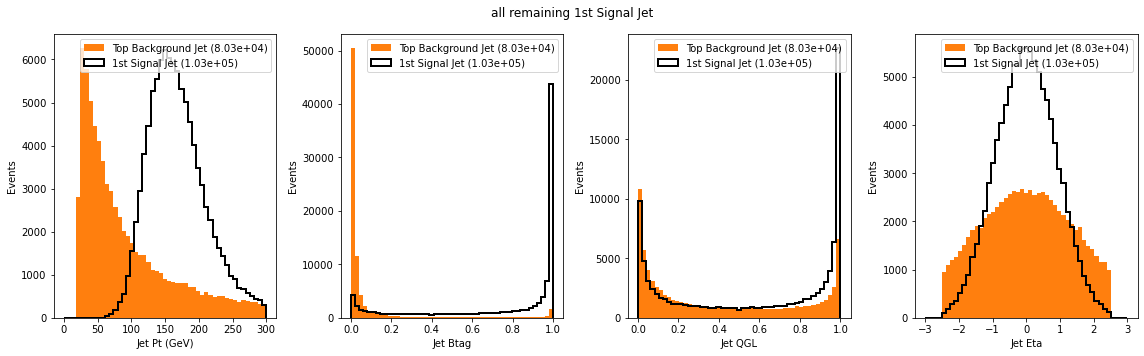

--- all remaining ---


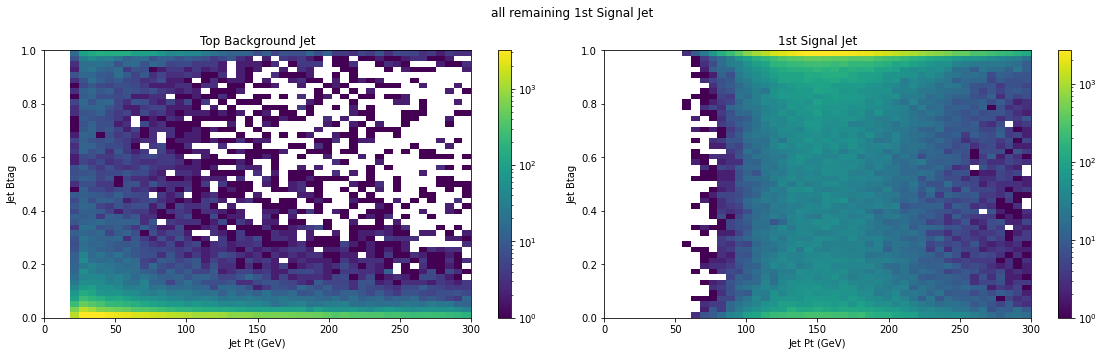

--- 1 T60 ---
Event Efficiency:   0.98
Selected Purity(1): 0.99
Passed Jet S/T:     0.99


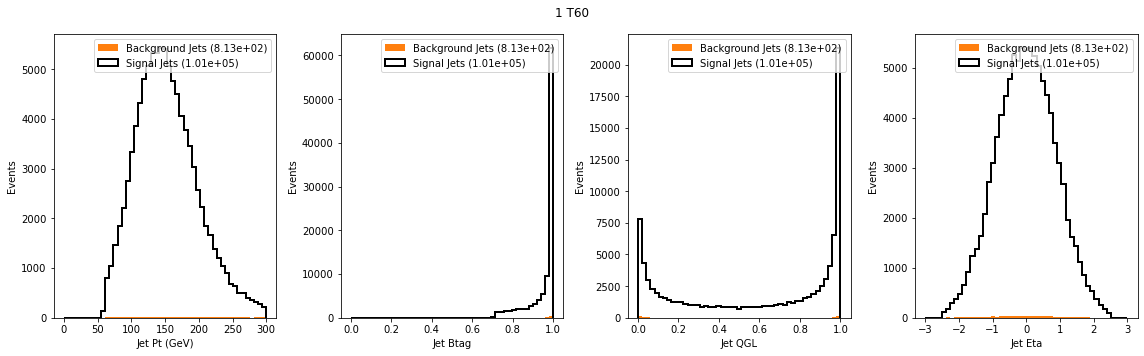

--- 1 T60 ---


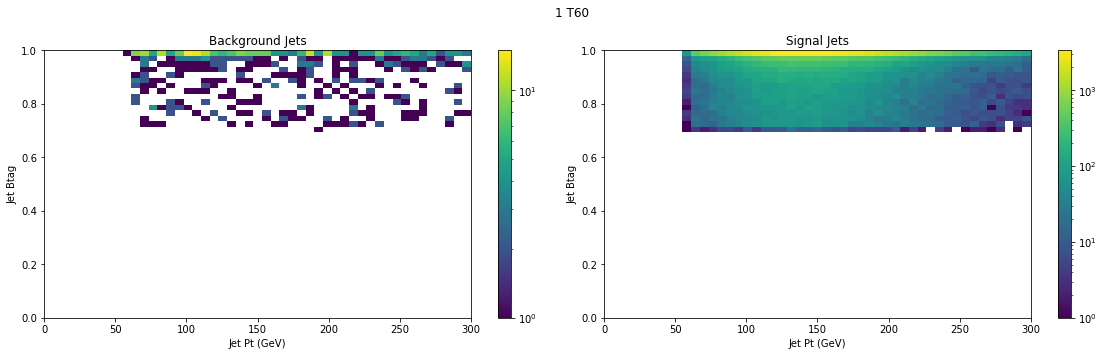

In [11]:
plot_selection(first_remaining,first_signaljet,tag="first")

--- 1 T60 | all remaining ---
Event Efficiency:   1.0
Selected Purity(6): 0.01
Passed Jet S/T:     0.76


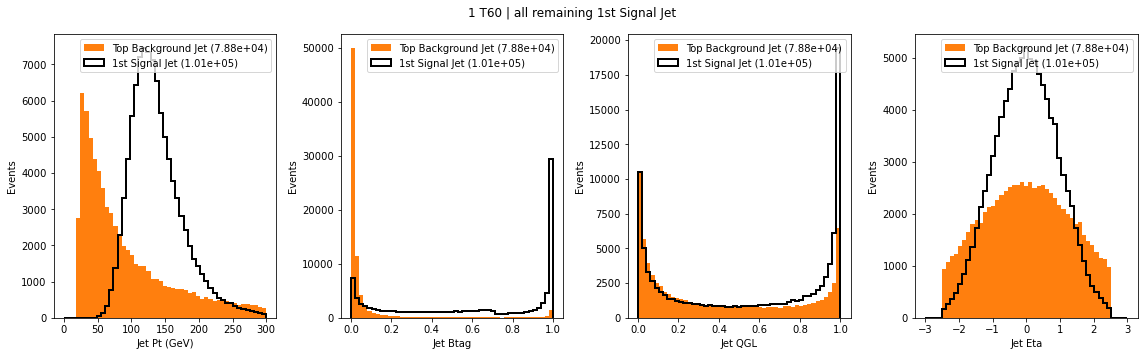

--- 1 T60 | all remaining ---


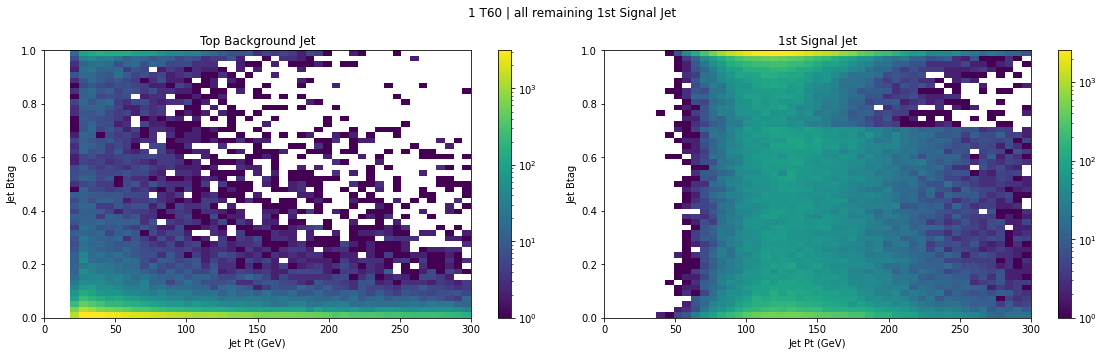

--- 1 T60 | 1 T40 ---
Event Efficiency:   0.96
Selected Purity(1): 0.99
Passed Jet S/T:     0.99


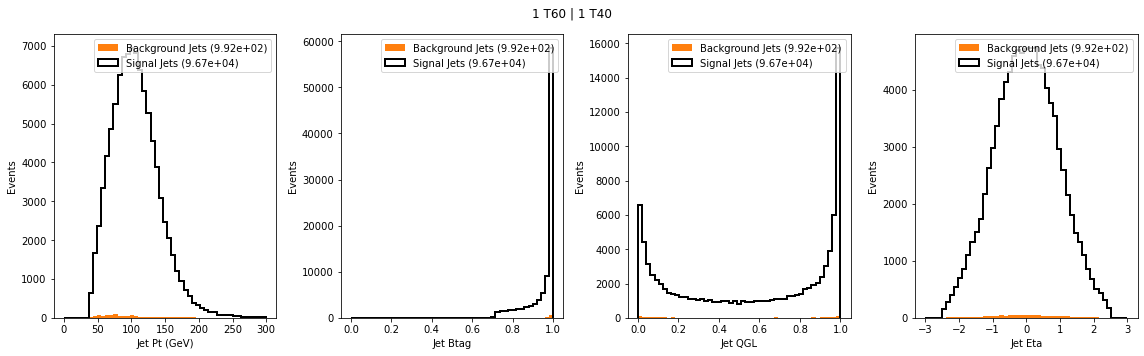

--- 1 T60 | 1 T40 ---


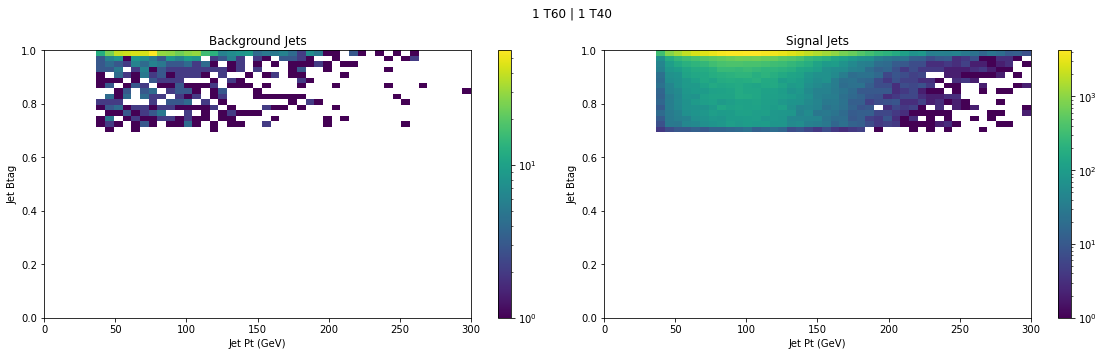

In [12]:
plot_selection(second_remaining,second_signaljet,tag="second")

--- 1 T60 | 1 T40 | all remaining ---
Event Efficiency:   1.0
Selected Purity(6): 0.00
Passed Jet S/T:     0.72


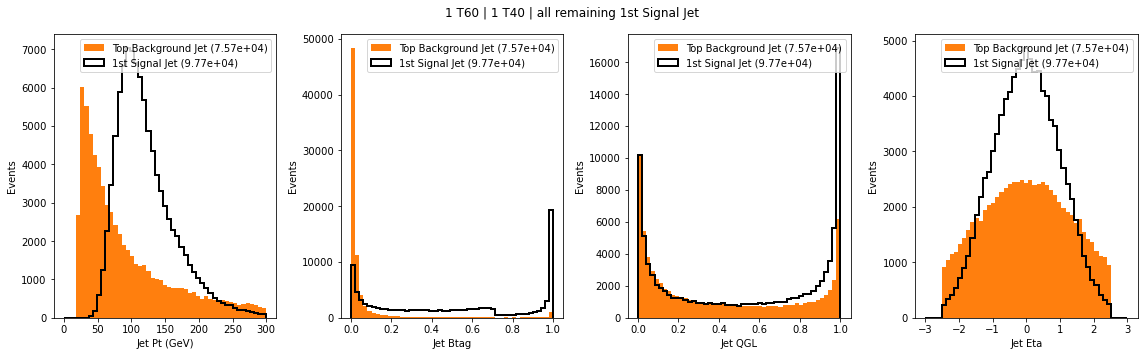

--- 1 T60 | 1 T40 | all remaining ---


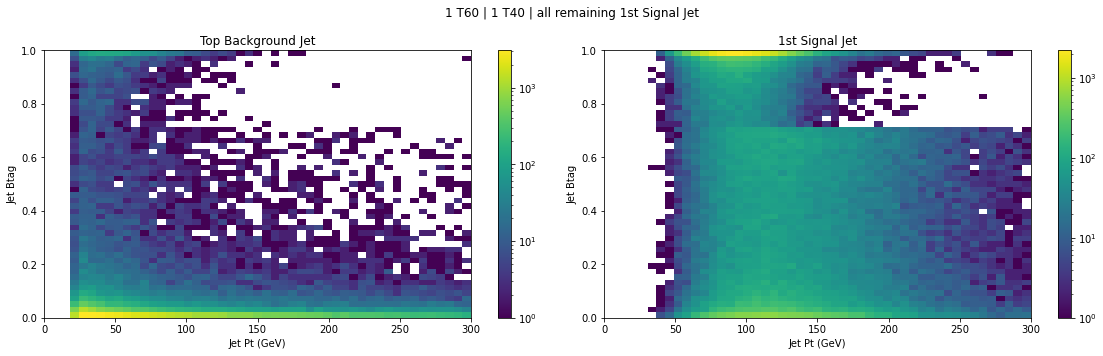

--- 1 T60 | 1 T40 | 1 M40 ---
Event Efficiency:   0.97
Selected Purity(1): 0.98
Passed Jet S/T:     0.98


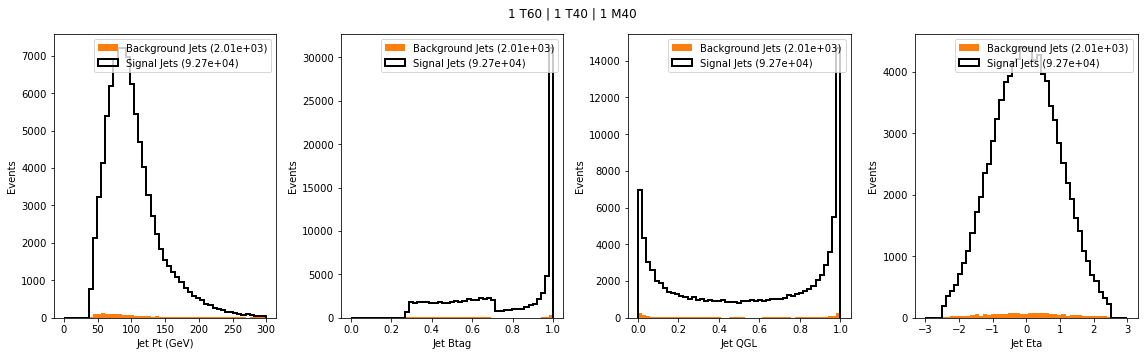

--- 1 T60 | 1 T40 | 1 M40 ---


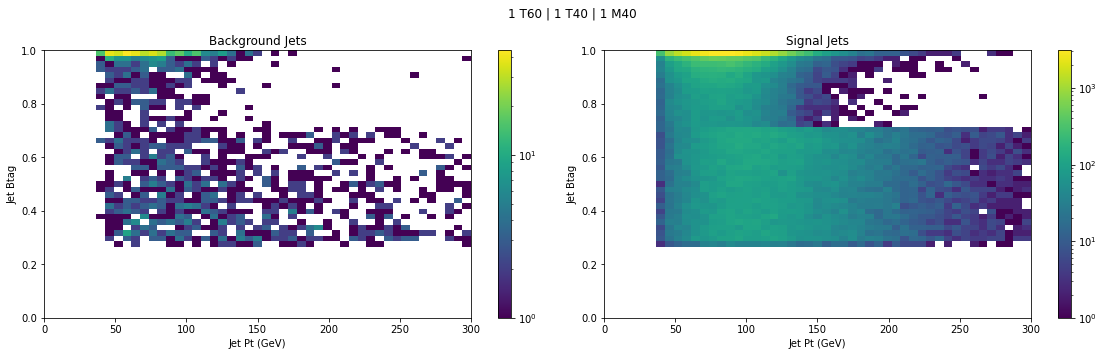

In [13]:
plot_selection(third_remaining,third_signaljet,tag="third")

--- 1 T60 | 1 T40 | 1 M40 | all remaining ---
Event Efficiency:   1.0
Selected Purity(6): 0.00
Passed Jet S/T:     0.67


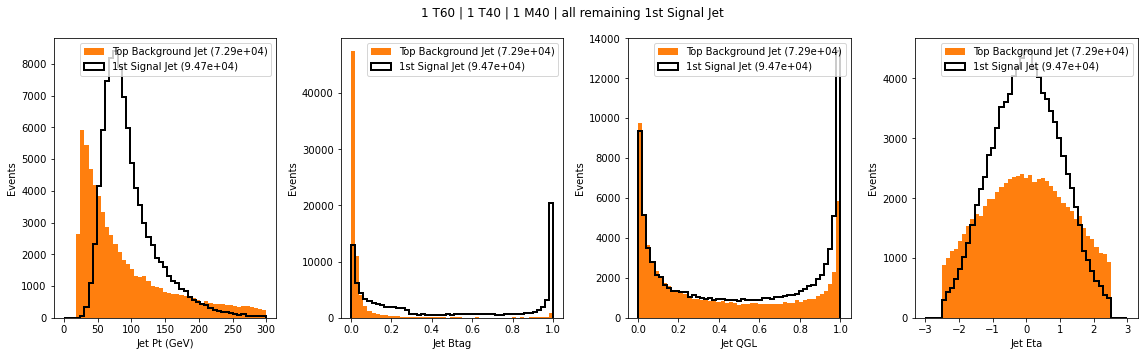

--- 1 T60 | 1 T40 | 1 M40 | all remaining ---


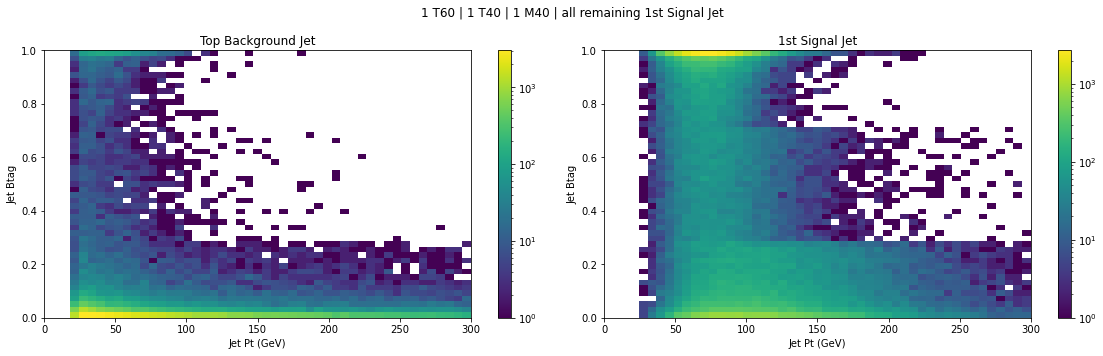

--- 1 T60 | 1 T40 | 1 M40 | 1 M20 ---
Event Efficiency:   0.96
Selected Purity(1): 0.98
Passed Jet S/T:     0.96


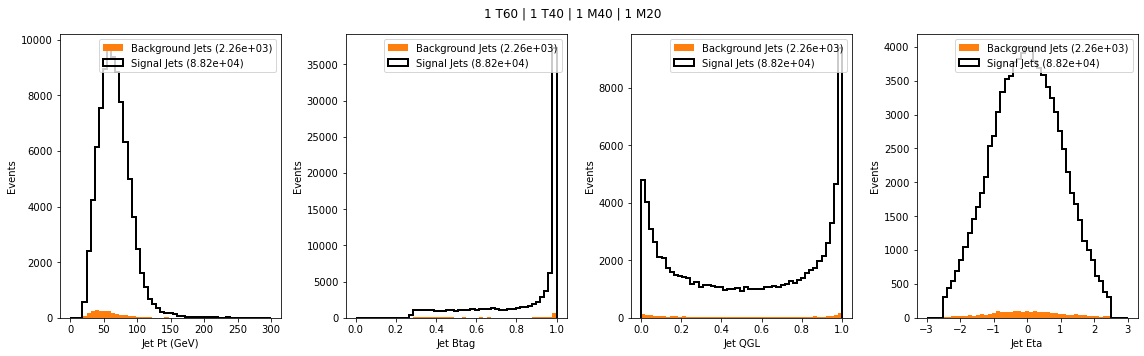

--- 1 T60 | 1 T40 | 1 M40 | 1 M20 ---


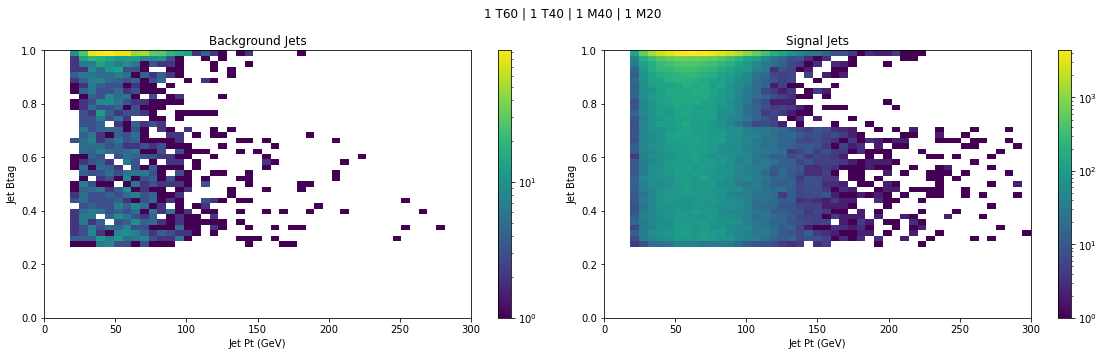

In [14]:
plot_selection(fourth_remaining,fourth_signaljet,tag="fourth")

--- 1 T60 | 1 T40 | 1 M40 | 1 M20 | all remaining ---
Event Efficiency:   1.0
Selected Purity(6): 0.00
Passed Jet S/T:     0.58


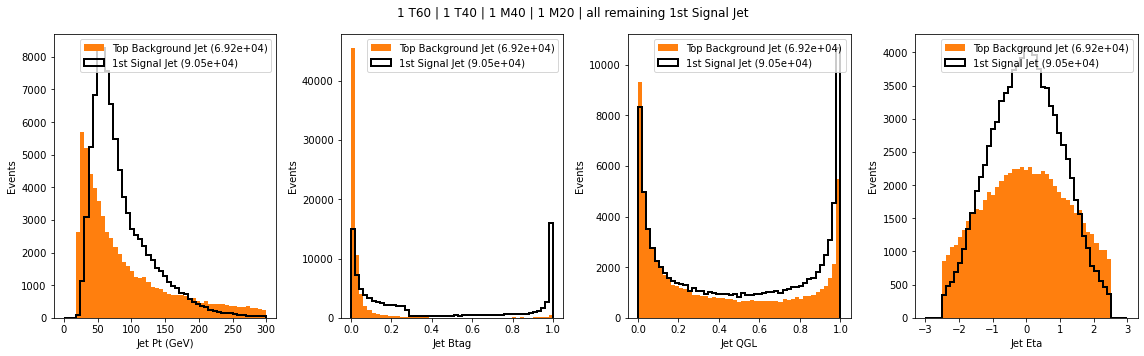

--- 1 T60 | 1 T40 | 1 M40 | 1 M20 | all remaining ---


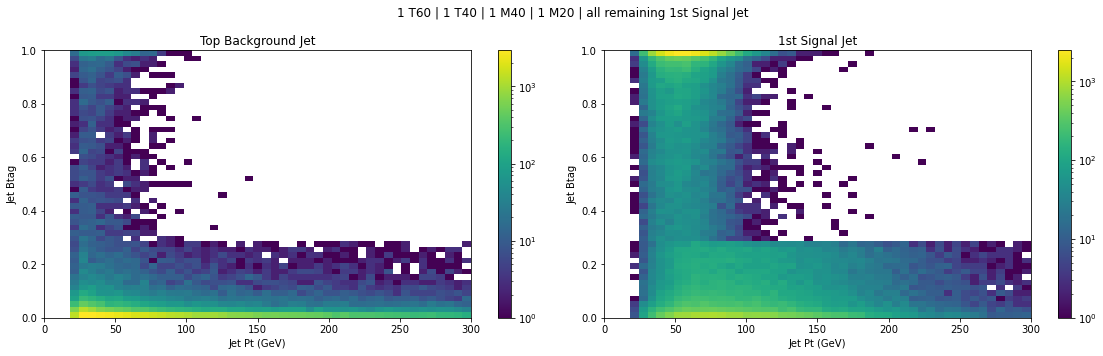

--- 1 T60 | 1 T40 | 1 M40 | 1 M20 | 1 L20 ---
Event Efficiency:   0.97
Selected Purity(1): 0.90
Passed Jet S/T:     0.86


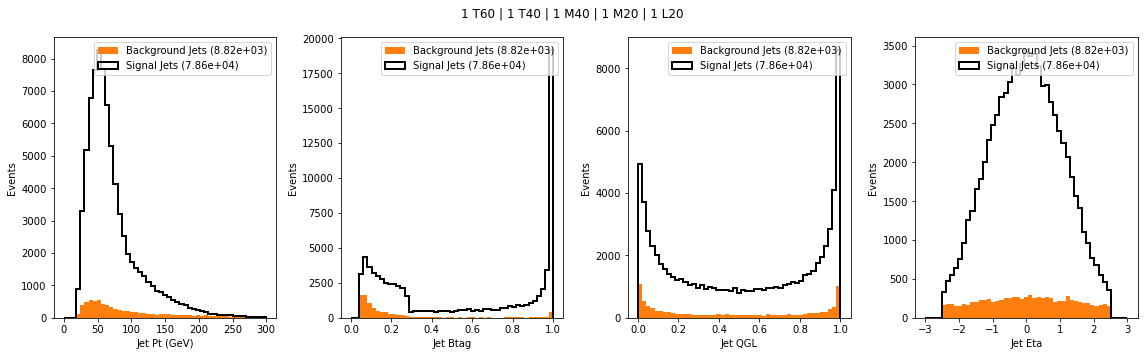

--- 1 T60 | 1 T40 | 1 M40 | 1 M20 | 1 L20 ---


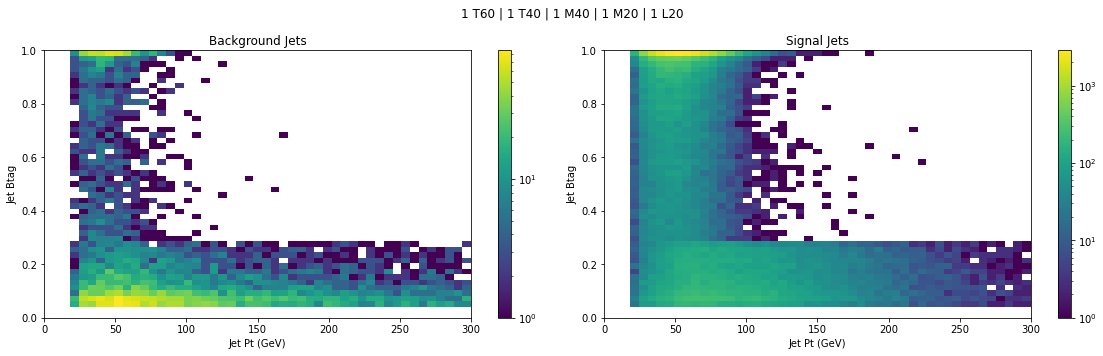

In [15]:
plot_selection(fifth_remaining,fifth_signaljet,tag="fifth")

--- 1 T60 | 1 T40 | 1 M40 | 1 M20 | 1 L20 | all remaining ---
Event Efficiency:   1.0
Selected Purity(6): 0.00
Passed Jet S/T:     0.45


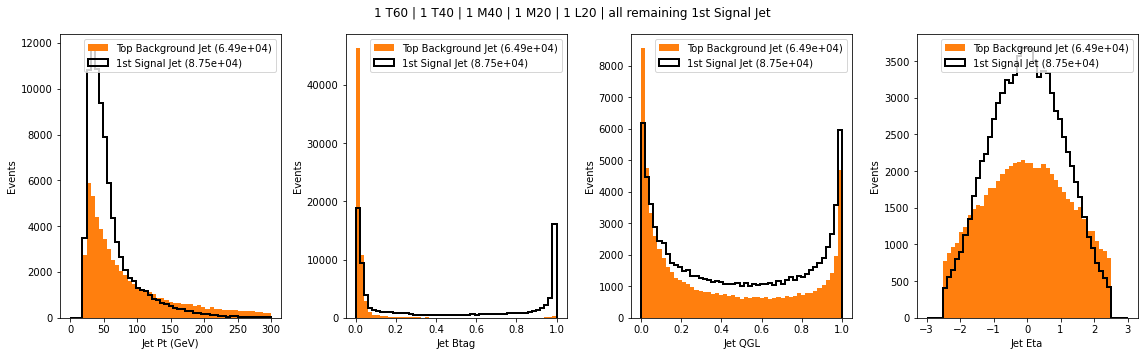

--- 1 T60 | 1 T40 | 1 M40 | 1 M20 | 1 L20 | all remaining ---


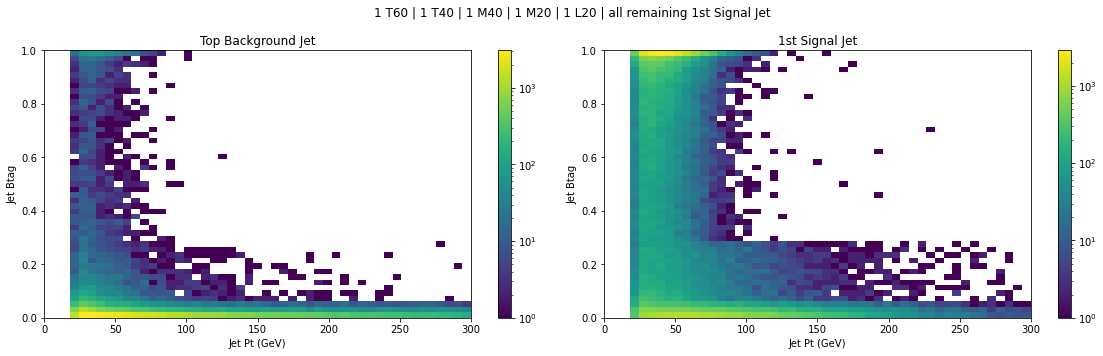

--- 1 T60 | 1 T40 | 1 M40 | 1 M20 | 1 L20 | 1 L20 ---
Event Efficiency:   0.75
Selected Purity(1): 0.88
Passed Jet S/T:     0.82


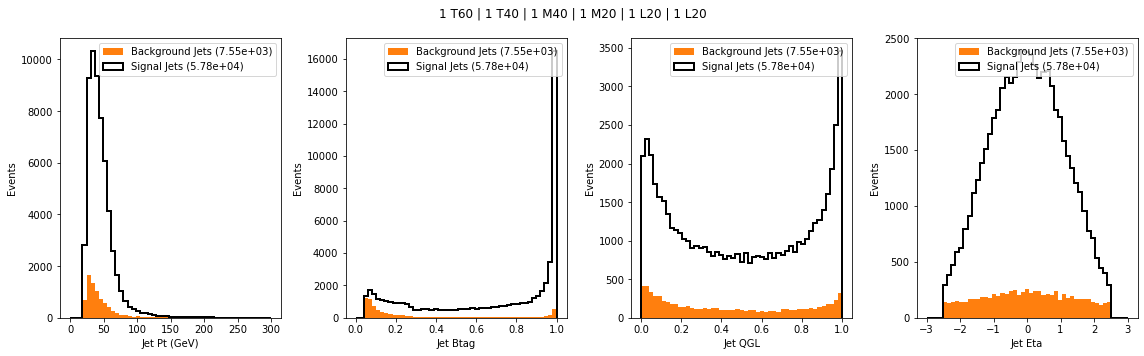

--- 1 T60 | 1 T40 | 1 M40 | 1 M20 | 1 L20 | 1 L20 ---


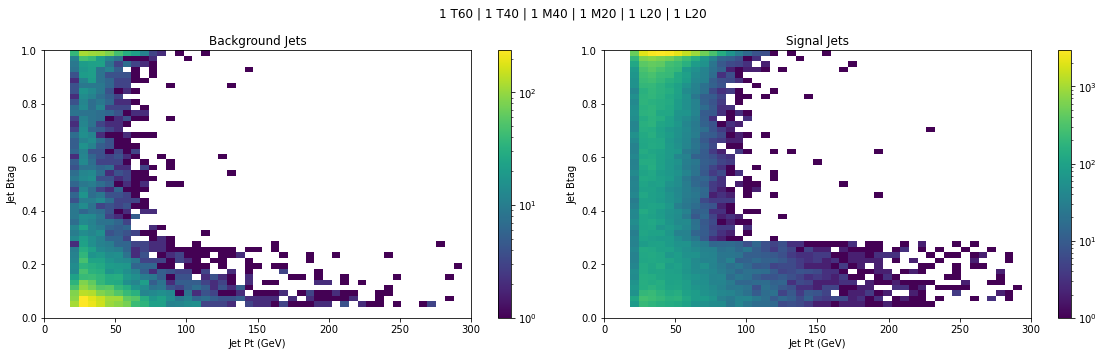

In [16]:
plot_selection(sixth_remaining,sixth_signaljet,tag="sixth")